In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import pydot
from matplotlib import pyplot as plt
from keras import Input, Model, layers, Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import np_utils


#sklearn 
from sklearn.metrics import confusion_matrix

Using Theano backend.
W0928 12:49:25.792932 139714135390016 blas_headers.py:988] Using NumPy C-API based implementation for BLAS functions.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

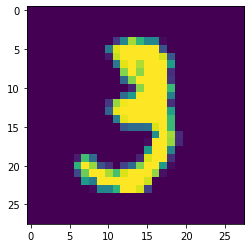

In [6]:
i = 10
print(X_train[i])
plt.imshow(X_train[i])

# DataSet Preparation

In [15]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000, 10)
X_test shape (10000, 28, 28)
y_test shape (10000, 10)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


#### Example

In [9]:
x = np.array([1, 2, 3])
np_utils.to_categorical(x)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [10]:
n = 10
np_utils.to_categorical(1, n)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
classes = 10
print(y_train.shape)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)


(60000,)
(60000, 10)


# Model Building

In [12]:
Model = Sequential()
Model.add(Dense(512, input_shape=(784,), activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(512, activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(10, activation='softmax'))

In [8]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [13]:
Model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
Model.fit(X_train, y_train, batch_size=128, epochs=20,)

Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2517 - acc: 0.9243
Epoch 2/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0992 - acc: 0.9701
Epoch 3/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0692 - acc: 0.9781
Epoch 4/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0562 - acc: 0.9818
Epoch 5/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0447 - acc: 0.9851
Epoch 6/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0384 - acc: 0.9867
Epoch 7/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.0342 - acc: 0.9884
Epoch 8/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0280 - acc: 0.9906
Epoch 9/20
60000/60000 [==============================] - 16s 263us/step - loss: 0.0283 - acc: 0.9904
Epoch 10/20
60000/60000 [==============================] - 16s 273us/step - loss: 

In [11]:
Model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[0.0661068175832946, 0.9854]

In [12]:
predictions = Model.predict(X_test)


In [18]:
# Model.predict(X_test[0])

X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
Y_pred = Model.predict_classes(X_test)

# Save and Load Neural Network Model 

    - You can also save model architecture alone to Json
    - Also only model weights 

In [14]:
Model.save('Mnist_NN.h5')

In [15]:
from keras.models import load_model

loaded_model = load_model('Mnist_NN.h5')

In [16]:
loaded_model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6])